<a href="https://colab.research.google.com/github/FahimHafiz/Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# **Data Visualization**
Reference: https://clauswilke.com/dataviz/

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

%matplotlib inline

### Hospital data exploration, preprocessing and visualization

different color link: https://www.color-hex.com/

In [ ]:
# You can clone the repository to connect the datasets path in Colab or your local machine 
!git clone https://github.com/FahimHafiz/Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning.git

Cloning into 'Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15 (delta 4), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 568.43 KiB | 9.32 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# Before and after vaccine data
before_vaccine_data = pd.read_csv('/content/Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning/datasets/Hospital_data_before_Vaccination.csv')
before_vaccine_data

,UniqueID,AdmDate,Age (month),Case Definition,Zila,Address,Outcome,Discharge Date
0,1,2010-12-01 00:00:00,14,Very Severe Disease,Mymensingh,Address1,Referred,2010-12-23 00:00:00
1,2,2010-02-11 00:00:00,6,Very Severe Disease,Rangpur,Address2,Referred,2010-03-01 00:00:00
2,3,2010-10-04 00:00:00,38,NaN,Mymensingh,Address3,Discharged,2010-10-14 00:00:00
3,4,2010-02-05 00:00:00,50,Missing,Rangpur,Address4,Died,2010-02-16 00:00:00
4,5,2010-01-26 00:00:00,23,Meningitis,Rangpur,Address5,DORB,2010-01-29 00:00:00
...,...,...,...,...,...,...,...,...
577,578,2015-03-24 00:00:00,16,Missing,Mymensingh,Address578,Referred,2015-03-28 00:00:00
578,579,2015-10-16 00:00:00,43,Missing,Mymensingh,Address579,Discharged,2015-11-01 00:00:00
579,580,2015-03-08 00:00:00,34,Not eligible,Dhaka,Address580,Referred,2015-03-23 00:00:00
580,581,2015-01-20 00:00:00,38,Missing,Chittagong,Address581,Discharged,2015-02-13 00:00:00


In [9]:
# Before and after vaccine data
after_vaccine_data = pd.read_csv('/content/Vaccination-Dataset-Preprocessing-Analysis-and-Prediction-Using-Machine-Learning/datasets/Hospital_data_after_Vaccination.csv')
after_vaccine_data

,UniqueID,AdmDate,Age (month),Case Definition,Zila,Address,Outcome,Discharge Date
0,583,13/07/2016 00:00,37,Missing,Rangpur,Address583,Referred,07/08/2016 00:00
1,584,19/03/2016 00:00,32,Enteric Fever,Khulna,Address584,Referred,10/04/2016 00:00
2,585,08/01/2016 00:00,45,Severe Pneumonia,Chittagong,Address585,DORB,05/02/2016 00:00
3,586,02/02/2016 00:00,7,Enteric Fever,Rangpur,Address586,Died,19/02/2016 00:00
4,587,04/02/2016 00:00,8,Enteric Fever,Dhaka,Address587,Referred,16/02/2016 00:00
...,...,...,...,...,...,...,...,...
339,922,02/04/2020 00:00,2,Enteric Fever,Rangpur,Address922,Died,30/04/2020 00:00
340,923,02/09/2020 00:00,35,Meningitis,Chittagong,Address923,DORB,14/09/2020 00:00
341,924,08/05/2020 00:00,29,Not eligible,Mymensingh,Address924,Discharged,18/05/2020 00:00
342,925,24/12/2020 00:00,35,Meningitis,Dhaka,Address925,Discharged,26/12/2020 00:00


In [ ]:
# Before vaccine data
before_vaccine_data['AdmDate'] = pd.to_datetime(before_vaccine_data['AdmDate'])

before_vaccine_data['year'] = before_vaccine_data['AdmDate'].dt.year

before_vaccine_data['Discharge Date'] = pd.to_datetime(before_vaccine_data["Discharge Date"])

before_vaccine_data



In [ ]:
after_vaccine_data

In [ ]:
# After vaccine data

after_vaccine_data['AdmDate'] = pd.to_datetime(after_vaccine_data['AdmDate'], dayfirst=True)

after_vaccine_data['year'] = after_vaccine_data['AdmDate'].dt.year

after_vaccine_data['Discharge Date'] = pd.to_datetime(after_vaccine_data["Discharge Date"], dayfirst=True)

after_vaccine_data

In [ ]:
# concatenete the before and after datasets

final_data = pd.concat([before_vaccine_data, after_vaccine_data], ignore_index=True)

# Optional: Sort the DataFrame by the year column if needed
final_data = final_data.sort_values(by='year')
final_data.reset_index(drop=True, inplace=True)
final_data

In [ ]:
# merge the hospital data with the lab data
df = pd.merge(final_data, lab_data, on='UniqueID', how='inner')

df.to_csv('temp1.csv')

In [ ]:
df['Duration'] = abs((df['AdmDate'] - df['Discharge Date']).dt.days)

df

In [ ]:
df.drop(['UniqueID','AdmDate', 'Discharge Date', 'Address'], axis=1, inplace=True)



In [ ]:
df.to_csv('temp2.csv')

In [ ]:
df

,Age (month),Case Definition,Zila,Outcome,year,Organism,source,method,Duration
0,14,Very Severe Disease,Mymensingh,Referred,2010,Organism1,CSF,PCR,22
1,42,NaN,Mymensingh,Died,2010,Organism1,both,culture,30
2,9,Not eligible,Barisal,Died,2010,Organism1,Blood,culture,22
3,13,Severe Pneumonia,Barisal,Referred,2010,Organism1,CSF,PCR,23
4,54,Missing,Sylhet,Discharged,2010,Organism1,both,ICT,30
...,...,...,...,...,...,...,...,...,...
921,5,Severe Pneumonia,Khulna,Referred,2020,Organism7,CSF,culture,23
922,14,Severe Pneumonia,Rajshahi,Referred,2020,Organism7,both,PCR,7
923,21,Not eligible,Barisal,Died,2020,Organism7,CSF,culture,16
924,9,Pneumonia,Rangpur,Died,2020,Organism7,CSF,PCR,26


In [ ]:
# Drop missing values
# let's first see how many missing values each column has.....

print(df.isnull().sum())

df.dropna(inplace=True, subset=['Case Definition', 'Zila'])

print(df.isnull().sum())


Age (month)        0
Case Definition    0
Zila               0
Outcome            0
year               0
Organism           0
source             0
method             0
Duration           0
dtype: int64
Age (month)        0
Case Definition    0
Zila               0
Outcome            0
year               0
Organism           0
source             0
method             0
Duration           0
dtype: int64
     Age (month)      Case Definition        Zila     Outcome  year  \
0             14  Very Severe Disease  Mymensingh    Referred  2010   
2              9         Not eligible     Barisal        Died  2010   
3             13     Severe Pneumonia     Barisal    Referred  2010   
4             54              Missing      Sylhet  Discharged  2010   
5             42              Missing       Dhaka    Referred  2010   
..           ...                  ...         ...         ...   ...   
921            5     Severe Pneumonia      Khulna    Referred  2020   
922           14     Severe 

In [ ]:
clean_data = df

clean_data.to_csv("Final_clean_data.csv")

In [ ]:
hospital_data_clean = pd.read_csv('Final_clean_data.csv')

hospital_data_clean

,Unnamed: 0,Age (month),Case Definition,Zila,Outcome,year,Organism,source,method,Duration
0,0,14,Very Severe Disease,Mymensingh,Referred,2010,Organism1,CSF,PCR,22
1,2,9,Not eligible,Barisal,Died,2010,Organism1,Blood,culture,22
2,3,13,Severe Pneumonia,Barisal,Referred,2010,Organism1,CSF,PCR,23
3,4,54,Missing,Sylhet,Discharged,2010,Organism1,both,ICT,30
4,5,42,Missing,Dhaka,Referred,2010,Organism1,Blood,culture,11
...,...,...,...,...,...,...,...,...,...,...
817,921,5,Severe Pneumonia,Khulna,Referred,2020,Organism7,CSF,culture,23
818,922,14,Severe Pneumonia,Rajshahi,Referred,2020,Organism7,both,PCR,7
819,923,21,Not eligible,Barisal,Died,2020,Organism7,CSF,culture,16
820,924,9,Pneumonia,Rangpur,Died,2020,Organism7,CSF,PCR,26


<Axes: xlabel='year', ylabel='Count'>

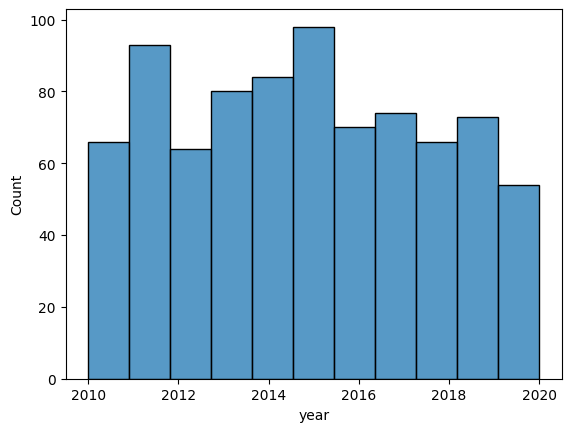

In [ ]:
# Let's have plot of frquency of the cases over time in a plot...

sns.histplot(data=hospital_data_clean, x='year', legend=True)

In [ ]:
affected_by_year = hospital_data_clean.groupby('year')['Outcome'].count().reset_index()
affected_by_year

,year,Outcome
0,2010,66
1,2011,93
2,2012,64
3,2013,80
4,2014,84
5,2015,98
6,2016,70
7,2017,74
8,2018,66
9,2019,73


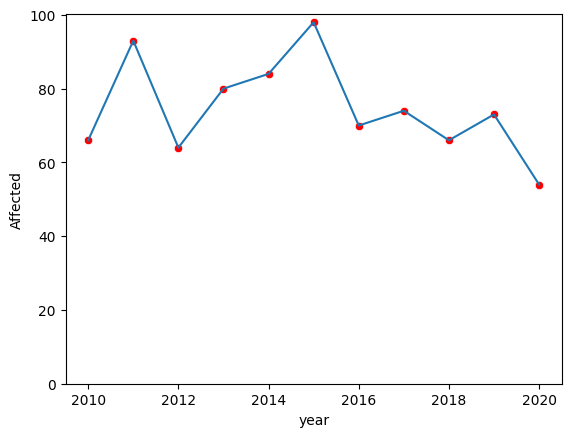

In [ ]:
sns.lineplot(x=affected_by_year['year'], y=affected_by_year['Outcome'])
sns.scatterplot(x=affected_by_year['year'], y=affected_by_year['Outcome'], color='red', marker='o')
plt.xlabel('year')
plt.ylabel('Affected')

plt.ylim(bottom=0)
plt.show()

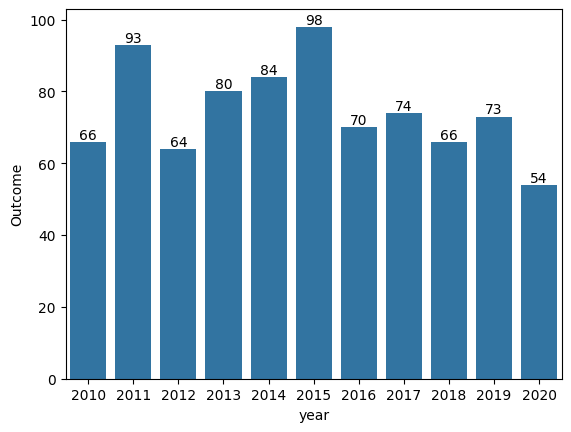

In [ ]:
# Bar plot....
ax = sns.barplot(x='year', y='Outcome', data=affected_by_year)

ax.bar_label(ax.containers[0])

plt.show()

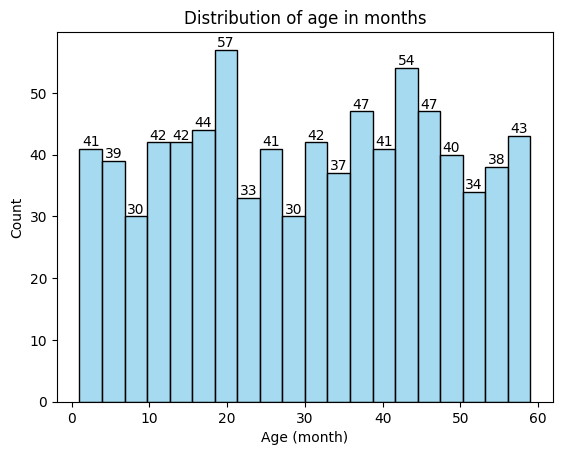

In [ ]:
# Bar plot....
ax = sns.histplot(data=hospital_data_clean, x='Age (month)', legend=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of age in months')

ax.bar_label(ax.containers[0])
plt.show()



In [ ]:
# Let's see the age distribution in more detailed for 0 to 5 month, 5 to 10 month and etc,.

age_organism_data = hospital_data_clean[['Age (month)', "Organism"]]

# Define age bins and their corresponding labels

bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, np.inf]
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '>55']

# Now let's Bin Age (months) data into categorical 'age_bin' using defined bins and labels

age_organism_data['age_bin'] = pd.cut(age_organism_data['Age (month)'], bins=bins, labels=labels, right=False)

# Group by 'age_bin' and count 'Organism' references, then reset index for plotting

age_bin_child = age_organism_data.groupby('age_bin')['Organism'].count().reset_index().rename(columns={'Organism':'Count'})

print(age_organism_data)
print(age_bin_child)

     Age (month)   Organism age_bin
0             14  Organism1   10-15
1              9  Organism1    5-10
2             13  Organism1   10-15
3             54  Organism1   50-55
4             42  Organism1   40-45
..           ...        ...     ...
817            5  Organism7    5-10
818           14  Organism7   10-15
819           21  Organism7   20-25
820            9  Organism7    5-10
821           58  Organism7     >55

[822 rows x 3 columns]
   age_bin  Count
0       <5     52
1     5-10     58
2    10-15     72
3    15-20     75
4    20-25     71
5    25-30     71
6    30-35     66
7    35-40     70
8    40-45     85
9    45-50     78
10   50-55     60
11     >55     64


<ipython-input-122-21e26e1528bd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_organism_data['age_bin'] = pd.cut(age_organism_data['Age (month)'], bins=bins, labels=labels, right=False)


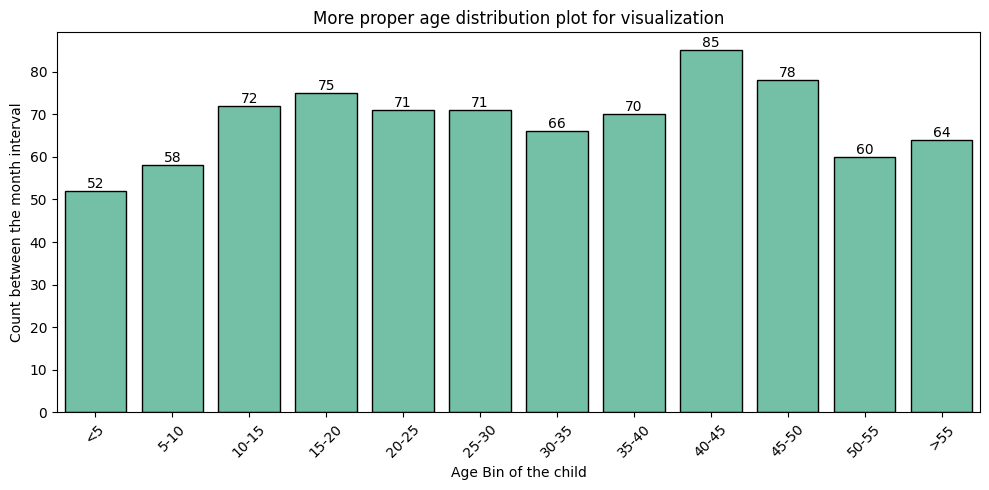

In [ ]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(x='age_bin', y='Count', data=age_bin_child, color = '#66cdaa', edgecolor='black')

plt.xlabel('Age Bin of the child')
plt.ylabel('Count between the month interval')
plt.title('More proper age distribution plot for visualization')
plt.xticks(rotation=45)
plt.tight_layout()  # adjust the layout for proper inteval...

ax.bar_label(ax.containers[0])
plt.show()

### Outcome Analysis

ValueError: unsupported format character ' ' (0x20) at index 2

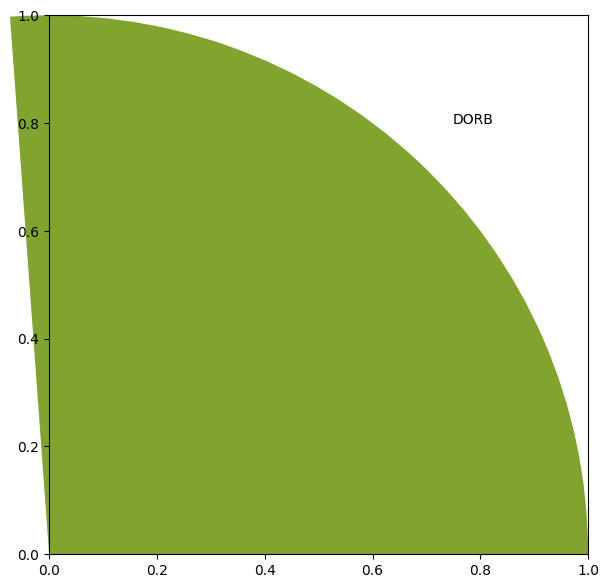

In [ ]:
outcome_counts = hospital_data_clean.groupby('Outcome')['Organism'].count().reset_index().rename(columns={'Organism':'Count'})
# outcome_counts

slice_colors = ['#80a42e', '#c04b4b', '#a56f8f', '#edca62']

plt.figure(figsize=(7, 7))
plt.pie(outcome_counts['Count'], labels=lst, autopct='%1 .1f%', colors=slice_colors)
plt.title('Outcome Pie Chart')

plt.show()

In [ ]:
lst = []
lst.extend(outcome_counts['Outcome'])

print(lst)

['DORB', 'Died', 'Discharged', 'Referred']


### Last Two years data analysis

In [ ]:
last_two_years = hospital_data_clean['year'].unique()[-2:]


last_two_years_data = hospital_data_clean[hospital_data_clean['year'].isin(last_two_years)]
last_two_years_data

,Unnamed: 0,Age (month),Case Definition,Zila,Outcome,year,Organism,source,method,Duration
695,796,9,Very Severe Disease,Khulna,Referred,2019,Organism7,both,ICT,16
696,797,40,Missing,Mymensingh,Referred,2019,Organism7,both,PCR,13
697,798,35,Very Severe Disease,Khulna,Died,2019,Organism7,Blood,culture,10
698,799,20,Pneumonia,Chittagong,DORB,2019,Organism7,CSF,culture,24
699,800,35,Enteric Fever,Khulna,Discharged,2019,Organism7,Blood,culture,12
...,...,...,...,...,...,...,...,...,...,...
817,921,5,Severe Pneumonia,Khulna,Referred,2020,Organism7,CSF,culture,23
818,922,14,Severe Pneumonia,Rajshahi,Referred,2020,Organism7,both,PCR,7
819,923,21,Not eligible,Barisal,Died,2020,Organism7,CSF,culture,16
820,924,9,Pneumonia,Rangpur,Died,2020,Organism7,CSF,PCR,26


In [ ]:
# Now let's organize the data according to the division

summary = last_two_years_data.groupby(['Zila', 'year']).size().reset_index().rename(columns={0: 'cases'})
summary

,Zila,year,cases
0,Barisal,2019,7
1,Barisal,2020,7
2,Chittagong,2019,8
3,Chittagong,2020,6
4,Dhaka,2019,7
5,Dhaka,2020,7
6,Khulna,2019,10
7,Khulna,2020,8
8,Mymensingh,2019,6
9,Mymensingh,2020,5


In [ ]:
# def hex_to_rgb(hex_code):
#     hex_code = hex_code.lstrip('#')  # Remove the '#' if present
#     r, g, b = tuple(int(hex_code[i:i + 2], 16) for i in (0, 2, 4))
#     return r, g, b

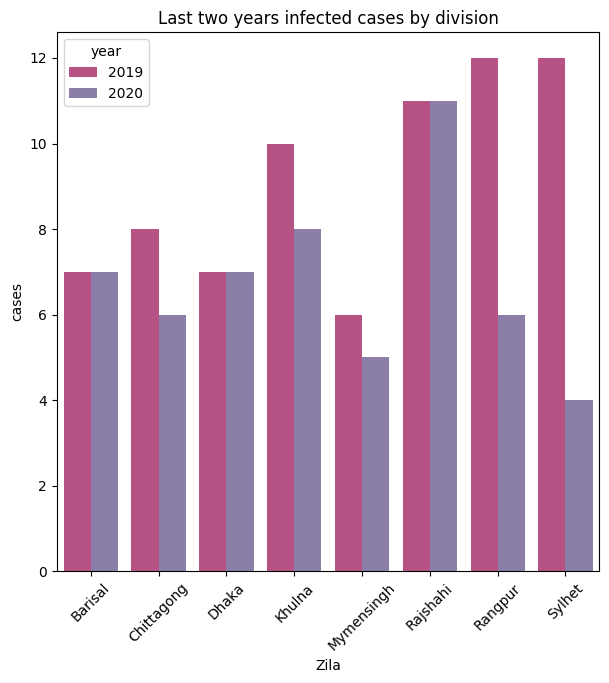

In [ ]:
# Now let's plot this summary data
hex_colors = ['#c84184', '#8878b0']
# colors = hex_to_rgb(hex_colors)

plt.figure(figsize=(7, 7))
sns.barplot(data=summary, x='Zila', y='cases', hue='year', palette=hex_colors)

plt.title('Last two years infected cases by division')
plt.xticks(rotation=45)
plt.show()

In [ ]:
hospital_data_clean

,Unnamed: 0,Age (month),Case Definition,Zila,Outcome,year,Organism,source,method,Duration
0,0,14,Very Severe Disease,Mymensingh,Referred,2010,Organism1,CSF,PCR,22
1,2,9,Not eligible,Barisal,Died,2010,Organism1,Blood,culture,22
2,3,13,Severe Pneumonia,Barisal,Referred,2010,Organism1,CSF,PCR,23
3,4,54,Missing,Sylhet,Discharged,2010,Organism1,both,ICT,30
4,5,42,Missing,Dhaka,Referred,2010,Organism1,Blood,culture,11
...,...,...,...,...,...,...,...,...,...,...
817,921,5,Severe Pneumonia,Khulna,Referred,2020,Organism7,CSF,culture,23
818,922,14,Severe Pneumonia,Rajshahi,Referred,2020,Organism7,both,PCR,7
819,923,21,Not eligible,Barisal,Died,2020,Organism7,CSF,culture,16
820,924,9,Pneumonia,Rangpur,Died,2020,Organism7,CSF,PCR,26


### Year wise boxplot of hospital duration

<ipython-input-169-3e06036111d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hospital_data_clean, x='year', y='Duration', palette='coolwarm')


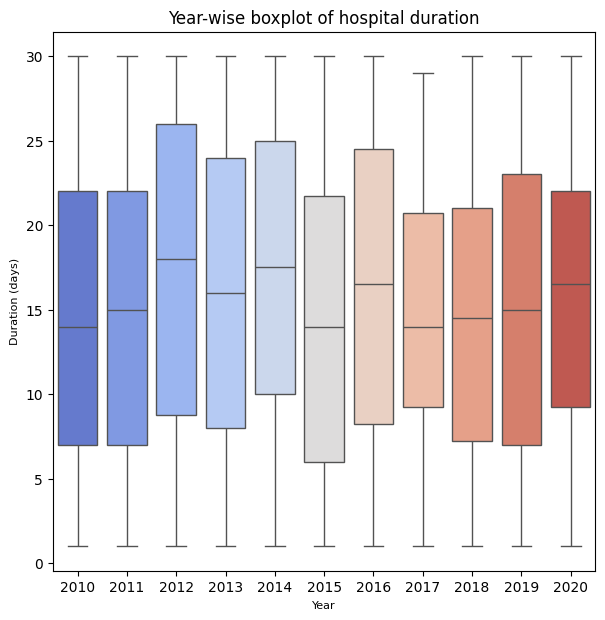

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=hospital_data_clean, x='year', y='Duration', palette='coolwarm')
plt.title("Year-wise boxplot of hospital duration")
plt.xlabel('Year', fontsize=8)
plt.ylabel("Duration (days)", fontsize=8)

plt.grid(False)
plt.show()


<ipython-input-170-5056b7f37f99>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=hospital_data_clean, x='year', y='Duration', palette='coolwarm')


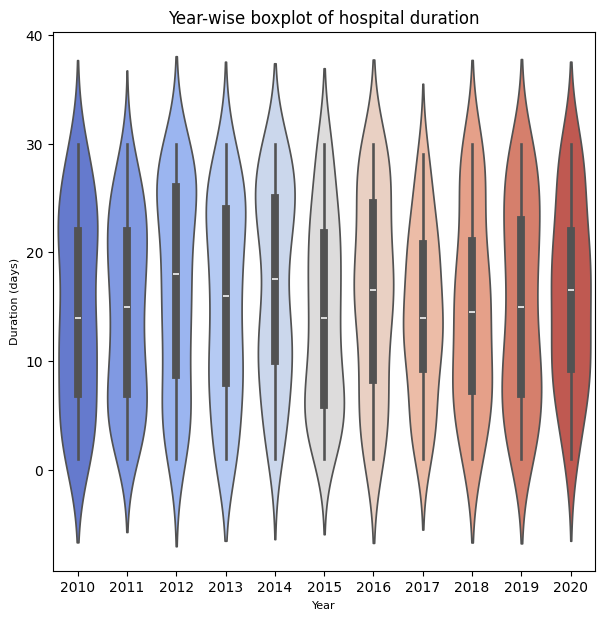

In [ ]:
plt.figure(figsize=(7, 7))
sns.violinplot(data=hospital_data_clean, x='year', y='Duration', palette='coolwarm')
plt.title("Year-wise boxplot of hospital duration")
plt.xlabel('Year', fontsize=8)
plt.ylabel("Duration (days)", fontsize=8)

plt.grid(False)
plt.show()


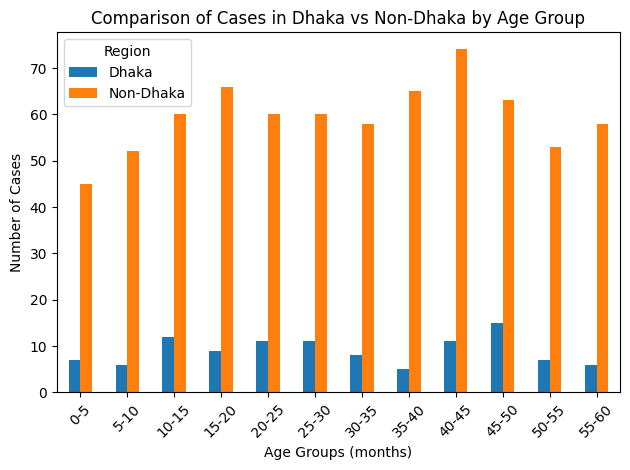

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = hospital_data_clean

# Define age ranges
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60']

# Create age groups
df['AgeGroup'] = pd.cut(df['Age (month)'], bins=bins, labels=labels, right=False)

# Split the data into Dhaka and Non-Dhaka
df['Region'] = df['Zila'].apply(lambda x: 'Dhaka' if x == 'Dhaka' else 'Non-Dhaka')

# Group by age group and region
grouped = df.groupby(['AgeGroup', 'Region']).size().unstack(fill_value=0)

# Plot the histogram
grouped.plot(kind='bar', stacked=False)

# Customizing the plot
plt.xlabel('Age Groups (months)')
plt.ylabel('Number of Cases')
plt.title('Comparison of Cases in Dhaka vs Non-Dhaka by Age Group')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()


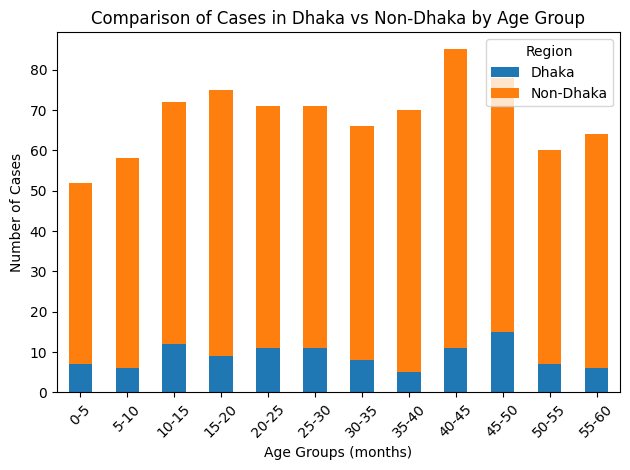

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = hospital_data_clean

# Define age ranges
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60']

# Create age groups
df['AgeGroup'] = pd.cut(df['Age (month)'], bins=bins, labels=labels, right=False)

# Split the data into Dhaka and Non-Dhaka
df['Region'] = df['Zila'].apply(lambda x: 'Dhaka' if x == 'Dhaka' else 'Non-Dhaka')

# Plot the histogram
ax = grouped.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Customizing the plot
ax.set_xlabel('Age Groups (months)')
ax.set_ylabel('Number of Cases')
ax.set_title('Comparison of Cases in Dhaka vs Non-Dhaka by Age Group')
ax.set_xticklabels(labels, rotation=45)
ax.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()